## download necessary packages


In [1]:
%pip install scikit-learn numpy pandas matplotlib seaborn 


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import fetch_california_housing

In [4]:
housing = fetch_california_housing()
x = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name="MedHouseVal")

In [5]:
print("California Housing dataset: ")
print(f"Dataset shape: {x.shape}")
print("\nFeatures: ", list(x.columns))
print(f"Target variable: {y.name}")
print("\nFirst 5 rows of features: ")
print(x.head())
print("\nTarget variable state: ")
print(y.describe())


California Housing dataset: 
Dataset shape: (20640, 8)

Features:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target variable: MedHouseVal

First 5 rows of features: 
   MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0  8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
1  8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
2  7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
3  5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
4  3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25

[5 rows x 8 columns]

Target variable state: 
count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64


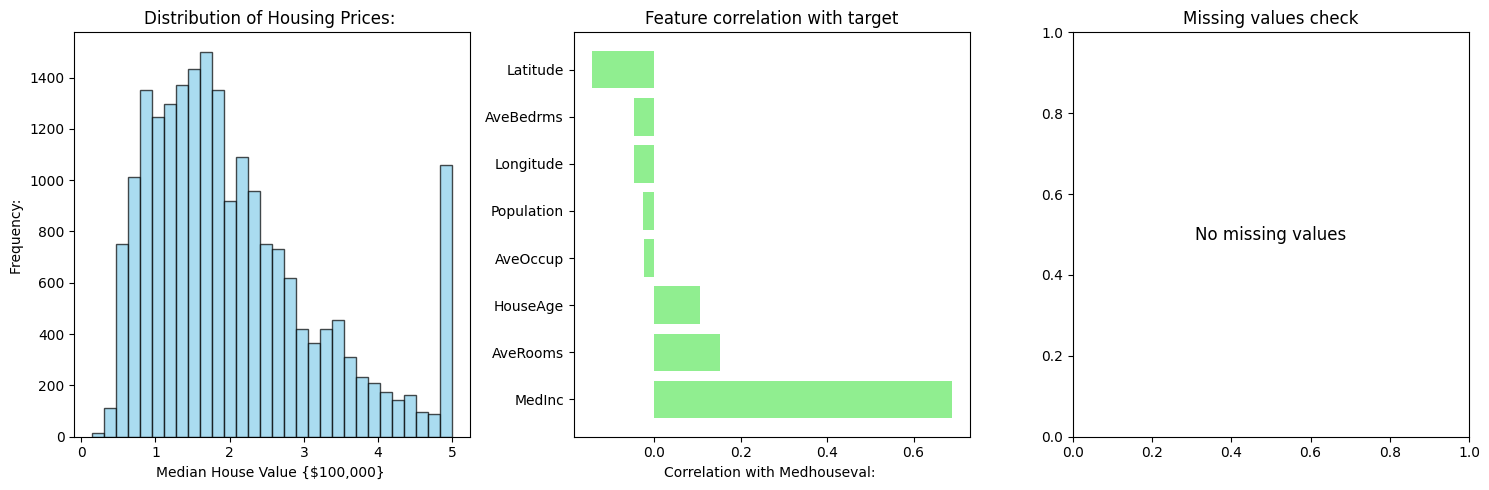

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(y, bins = 30, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Median House Value {$100,000} ')
plt.ylabel('Frequency: ')
plt.title('Distribution of Housing Prices: ')

plt.subplot(1,3,2)
correlations = x.corrwith(y).sort_values(ascending=False)
plt.barh(correlations.index, correlations.values, color='lightgreen')
plt.xlabel('Correlation with Medhouseval: ')
plt.title('Feature correlation with target')

plt.subplot(1,3,3)
missing_v = x.isnull().sum()
if missing_v.sum()>0: 
    plt.barh(missing_v.index, missing_v.values, color='salmon')
    plt.xlabel('Missing Values Count')
    plt.title('Missing values by feature')
else:
    plt.text(0.5,0.5, "No missing values", ha='center', va='center', fontsize=12)
    plt.title('Missing values check')

plt.tight_layout()
plt.show()
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


In [8]:
print(f"\nTraining set size: {x_train.shape[0]}")
print(f"Test size: {x_test.shape[0]}")


Training set size: 16512
Test size: 4128


In [9]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

model = LinearRegression()
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))




In [10]:
print("\n" + "="*50)
print("Model Performance Metrics: ")
print("="*50)
print(f"R2 Score: {r2:.4f}")
print(f"Avg House Price: ${y.mean()*10000:.2f}")
print(f"RMSE in Dollars: ${rmse*10000:.2f}")


Model Performance Metrics: 
R2 Score: 0.5888
Avg House Price: $20685.58
RMSE in Dollars: $7340.74
